In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set(font_scale = 1.2)

In [3]:
edited_colordict = {0: '#fec7f8', #"#d3fe14", 
             2: "#fec7f8",
             3: "#0b7b3e",
             4: "#ff8a65",
             5: "#0bf0e9",
             6: "#c203c8",
             7: "#fd9b39",
             13: "#fee7c0",
             15: "#1da49c",
             17: "#bbd9fd",
             18: "#fe6cfe",
             20: "#78579e",
             27: "#c203c8",
             36: "#d4ccd1",
             41: "#d8bb7d",
             57: "#d24dfe",
             62: "#646b8c",
             65: "#c4d5b5",
             66: "#fdc4bd",
             67: "#1cae05",
             68: "#7bd972"
            }
inferred_colordict = {0: "#d3fe14", 
             1: "#c9080a",
             2: "#fec7f8",
             3: "#0b7b3e",
             4: "#3957ff",
             5: "#0bf0e9",
             6: "#c203c8",
             7: "#fd9b39",
             8: "#906407",
             9: "#98ba7f",
             10: "#fe6794",
             11: "#10b0ff",
             12: "#ac7bff", 
             13: "#fee7c0",
             14: "#964c63",
             15: "#1da49c",
             16: "#0ad811",
             17: "#bbd9fd",
             18: "#fe6cfe",
             19: "#d1a09c",
             20: "#78579e",
             21: "#81ffad",
             22: "#739400",
             23: "#ca6949",
             24: "#d9bf01",
             25: "#646a58",
             26: "#d5097e",
             27: "#bb73a9",
             28: "#ccf6e9",
             29: "#9cb4b6",
             30: "#b6a7d4",
             31: "#9e8c62",
             32: "#6e83c8",
             33: "#01af64",
             34: "#a71afd",
             35: "#cfe589",
             36: "#d4ccd1",
             37: "#fd4109",
             38: "#bf8f0e",
             39: "#2f786e",
             40: "#4ed1a5",
             41: "#d8bb7d",
             42: "#a54509",
             43: "#6a9276",
             44: "#a4777a",
             45: "#fc12c9",
             46: "#606f15",
             47: "#3cc4d9",
             48: "#f31c4e",
             49: "#73616f",
             50: "#f097c6",
             51: "#fc8772",
             52: "#92a6f3",
             53: "#875b44",
             54: "#699ab3",
             55: "#94bc19",
             56: "#7d5bf0",
             57: "#d24dfe",
             58: "#c85b74",
             59: "#68ff57",
             60: "#b62347",
             61: "#994b91",
             62: "#646b8c",
             63: "#977ab4",
             64: "#d694fd",
             65: "#c4d5b5",
             67: "#1cae05",
             68: "#7bd972",
             69: "#e9700a"
            }


In [4]:
postfile = "/Users/gillianchu/mek/cnaviz/simulations/hatchet-paper/simulation/free/noWGD/dataset_n2_s4669/k4_01090_02008_00506035_00504055/hatchet/edited/hatchet.seg.ucn_20211231120537.tsv" 
prefile = "/Users/gillianchu/mek/cnaviz/simulations/hatchet-paper/simulation/free/noWGD/dataset_n2_s4669/k4_01090_02008_00506035_00504055/hatchet/hatchet.seg.ucn_cn_annotated_maxmin.bb"

In [5]:
bb_pre = pd.read_csv(prefile, sep='\t', names=['CHR', 'START', 'END', 'SAMPLE', 'RDR', 'SNPS', 'COV', 'A', 'B', 'BAF', 'CLUSTER'], skiprows=1)
bb_post = pd.read_csv(postfile, sep='\t', names=['CHR', 'START', 'END', 'SAMPLE', 'RDR', 'SNPS', 'COV', 'A', 'B', 'BAF', 'CLUSTER'], skiprows=1)

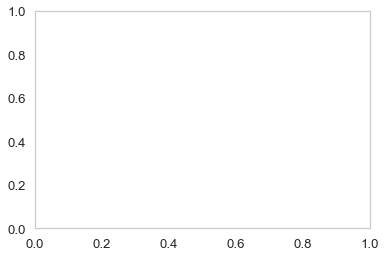

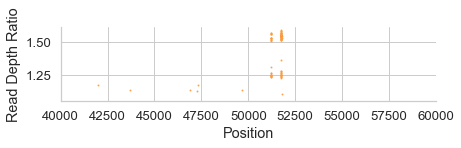

In [6]:
# HATCHet
sns.set_style("whitegrid")
plt.gca().grid(False)

bb_pre = pd.merge(bb_pre, bb_pre[['CHR', 'START', 'END']].drop_duplicates().reset_index(drop=True).reset_index())
bb_pre_proc1 = bb_pre[bb_pre['SAMPLE'] == 'bulk_035clone1_06clone0_005normal']
bb_pre_proc2 = bb_pre_proc1[bb_pre_proc1['CLUSTER'] == 7]
sns.lmplot(data=bb_pre_proc2, x='index', y='RDR', row='SAMPLE', fit_reg=False, hue='CLUSTER', palette=['#fd9b39'], scatter_kws={"s": 1}, height=2, aspect=3).set(xlim=(40000,60000), title="", xlabel="Position", ylabel="Read Depth Ratio")._legend.remove()
plt.savefig('/Users/gillianchu/mek/cnaviz/simulations/scripts/sim_plot/linearplots/s4669_pre_hatchet_rdr.svg', dpi=300, bbox_inches='tight')


In [7]:
bb_pre = pd.read_csv(prefile, sep='\t', names=['CHR', 'START', 'END', 'SAMPLE', 'RDR', 'SNPS', 'COV', 'A', 'B', 'BAF', 'CLUSTER'], skiprows=1)
bb_pre['CHR'] = bb_pre['CHR'].apply(lambda x: int(x[3:]))

bb_pre = pd.merge(bb_pre.sort_values("CHR"), bb_pre.sort_values("CHR")[['CHR', 'START', 'END']].drop_duplicates().reset_index(drop=True).reset_index())
bb_pre_proc1 = bb_pre[bb_pre['SAMPLE'] == 'bulk_035clone1_06clone0_005normal']
bb_pre_proc2 = bb_pre_proc1[bb_pre_proc1['CLUSTER'] == 7]


# Get the start of each chromosome in order to calculate the genome position of each bin
chr_starts = {}
chrs = list(bb_pre_proc1["CHR"].unique()) # 1 - 22
chrs.sort()
length = 0
for chrm in chrs:
    chr_starts[chrm] = length
    length += bb_pre_proc1[bb_pre_proc1['CHR'] == chrm]['END'].max()

    
# Create new row in dataframe for the position in the genome
# Just takes the starting genome position of the chromosome and adds the offset of the bin from the start of the chr
bb_pre_proc2['genomePosition'] = bb_pre_proc2.apply(lambda row: row['START'] + chr_starts[row['CHR']], axis = 1)
bb_pre_proc2


/Users/gillianchu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,CHR,START,END,SAMPLE,RDR,SNPS,COV,A,B,BAF,CLUSTER,index,genomePosition
12279,1,68550000,68600000,bulk_035clone1_06clone0_005normal,1.082030,236,41.635593,3825,6001,0.389273,7,4093,68550000
12489,1,57950000,58000000,bulk_035clone1_06clone0_005normal,1.162718,172,45.598837,3034,4809,0.386842,7,4163,57950000
16403,2,147000000,147050000,bulk_035clone1_06clone0_005normal,1.188626,163,47.153374,2836,4850,0.368983,7,5467,396250000
20949,2,42950000,43000000,bulk_035clone1_06clone0_005normal,1.096075,202,41.658416,3329,5086,0.395603,7,6983,292200000
25033,2,98850000,98900000,bulk_035clone1_06clone0_005normal,1.087907,212,42.669811,3541,5505,0.391444,7,8344,348100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156732,20,30500000,30550000,bulk_035clone1_06clone0_005normal,1.536828,158,58.746835,2840,6442,0.305969,7,52244,2747578995
156735,20,30550000,30600000,bulk_035clone1_06clone0_005normal,1.534688,158,59.974684,2912,6564,0.307303,7,52245,2747628995
156738,20,30600000,30650000,bulk_035clone1_06clone0_005normal,1.523849,150,58.973333,2725,6121,0.308049,7,52246,2747678995
156741,20,30650000,30700000,bulk_035clone1_06clone0_005normal,1.549506,174,60.580460,3360,7181,0.318755,7,52247,2747728995


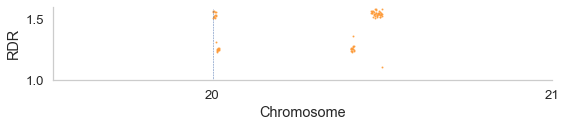

In [8]:


sns.lmplot(data=bb_pre_proc2[bb_pre_proc2["SAMPLE"]=="bulk_035clone1_06clone0_005normal"], x='genomePosition', y='RDR', fit_reg=False, height=2, aspect=4, hue='CLUSTER', palette=['#fd9b39'], scatter_kws={"s": 1}, legend=False).set(ylim=(1.0,1.6), title="")
plt.gca().set_ylabel("RDR")
plt.gca().set_xlabel("Chromosome")
plt.gcf().tight_layout()

maxY = bb_pre_proc2['RDR'].max()

# only display every other chr to prevent overlap of labels
odd_chr_starts = dict(filter(lambda chr_start: chr_start[0] % 2 != 0, chr_starts.items())) 
even_chr_starts = dict(filter(lambda chr_start: chr_start[0] % 2 == 0, chr_starts.items())) 
#x_ticks = list(odd_chr_starts.values())
x_ticks = list(chr_starts.values())
plt.gca().set_xticks(x_ticks)
plt.gca().set_xticklabels(list(chr_starts.keys()))
#plt.gca().set_xticklabels(list(odd_chr_starts.keys()))
plt.gca().set_xlim((2687514503, 2780078995))
# vertical lines at the last bin position of every cluster 

sns.set_style("whitegrid")
plt.gca().grid(False)
chr_lines = list(chr_starts.values())
plt.gca().vlines(x=chr_lines, ymin=0, ymax=maxY, linestyles='dashed', lw=0.5)

plt.savefig('/Users/gillianchu/mek/cnaviz/simulations/scripts/sim_plot/linearplots/s4669_hatchet_rdr.svg', dpi=300, bbox_inches='tight')



In [9]:
chr_starts[19], chr_starts[20], chr_starts[21]

(2657950012, 2717078995, 2780078995)

In [10]:
(2657950012 + 2717078995)/2

2687514503.5

/Users/gillianchu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


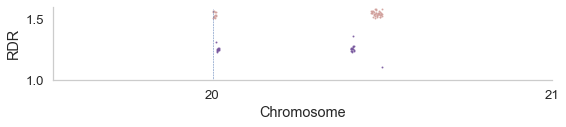

In [11]:
# HATCHet + CNAViz
bb_post = pd.read_csv(postfile, sep='\t', names=['CHR', 'START', 'END', 'SAMPLE', 'RDR', 'SNPS', 'COV', 'A', 'B', 'BAF', 'CLUSTER'], skiprows=1)
bb_post['CHR'] = bb_post['CHR'].apply(lambda x: int(x[3:]))
bb_post = pd.merge(bb_post.sort_values("CHR"), bb_pre.sort_values("CHR")[['CHR', 'START', 'END']].drop_duplicates().reset_index(drop=True).reset_index())

bb_post_proc1 = bb_post[bb_post['SAMPLE'] == 'bulk_035clone1_06clone0_005normal']
bb_post_proc2 = bb_post_proc1[(bb_post_proc1['CLUSTER'] == 19) | (bb_post_proc1['CLUSTER'] == 20)]


# Get the start of each chromosome in order to calculate the genome position of each bin
chr_starts = {}
chrs = list(bb_post_proc1["CHR"].unique()) # 1 - 22
chrs.sort()
length = 0
for chrm in chrs:
    chr_starts[chrm] = length
    length += bb_post_proc1[bb_post_proc1['CHR'] == chrm]['END'].max()
    
# Create new row in dataframe for the position in the genome
# Just takes the starting genome position of the chromosome and adds the offset of the bin from the start of the chr
bb_post_proc2['genomePosition'] = bb_post_proc2.apply(lambda row: row['START'] + chr_starts[row['CHR']], axis = 1)

sns.lmplot(data=bb_post_proc2[bb_post_proc2["SAMPLE"]=="bulk_035clone1_06clone0_005normal"], x='genomePosition', y='RDR', fit_reg=False, height=2, aspect=4, hue='CLUSTER', palette=['#d1a09c', '#78579e'], scatter_kws={"s": 1}, legend=False).set(ylim=(1.0,1.6), title="")
plt.gca().set_ylabel("RDR")
plt.gca().set_xlabel("Chromosome")
plt.gcf().tight_layout()

maxY = bb_pre_proc2['RDR'].max()

# only display every other chr to prevent overlap of labels
odd_chr_starts = dict(filter(lambda chr_start: chr_start[0] % 2 != 0, chr_starts.items())) 
even_chr_starts = dict(filter(lambda chr_start: chr_start[0] % 2 == 0, chr_starts.items())) 
#x_ticks = list(odd_chr_starts.values())
x_ticks = list(chr_starts.values())
plt.gca().set_xticks(x_ticks)
plt.gca().set_xticklabels(list(chr_starts.keys()))
#plt.gca().set_xticklabels(list(odd_chr_starts.keys()))
plt.gca().set_xlim((2687514503, 2780078995))
# vertical lines at the last bin position of every cluster 

sns.set_style("whitegrid")
plt.gca().grid(False)
chr_lines = list(chr_starts.values())
plt.gca().vlines(x=chr_lines, ymin=0, ymax=maxY, linestyles='dashed', lw=0.5)

plt.savefig('/Users/gillianchu/mek/cnaviz/simulations/scripts/sim_plot/linearplots/s4669_hatchet_cnaviz_rdr.svg', dpi=300, bbox_inches='tight')



In [12]:
# ASCAT Datafiles
truthfile = "/Users/gillianchu/mek/cnaviz/simulations/hatchet-paper/simulation/data/noWGD/dataset_n2_s4669/k4_01090_02008_00506035_00504055_cn_annotated_maxmin.bb" 
postfile = "/Users/gillianchu/mek/cnaviz/ascat/cnaviz_outputs/s4669_20220110033110.tsv" 
prefile = "/Users/gillianchu/mek/cnaviz/ascat/cnaviz_inputs/s4669_aspcf_cnavizin.txt"

In [13]:
# ASCAT 

bb_pre = pd.read_csv(prefile, sep='\t', names=['CHR', 'START', 'END', 'SAMPLE', 'RDR', 'SNPS', 'COV', 'A', 'B', 'BAF', 'CLUSTER'], skiprows=1)
bb_pre['CHR'] = bb_pre['CHR'].apply(lambda x: int(x[3:]))

bb_pre = pd.merge(bb_pre.sort_values("CHR"), bb_pre.sort_values("CHR")[['CHR', 'START', 'END']].drop_duplicates().reset_index(drop=True).reset_index())
bb_pre_proc1 = bb_pre[bb_pre['SAMPLE'] == 'bulk_035clone1_06clone0_005normal']
bb_pre_proc2 = bb_pre_proc1[(bb_pre_proc1['CLUSTER'] == 38) | (bb_pre_proc1['CLUSTER'] == 36) | (bb_pre_proc1['CLUSTER'] == 43) | (bb_pre_proc1['CLUSTER'] == 22) | (bb_pre_proc1['CLUSTER'] == 40)| (bb_pre_proc1['CLUSTER'] == 5)| (bb_pre_proc1['CLUSTER'] == 7)| (bb_pre_proc1['CLUSTER'] == 43| (bb_pre_proc1['CLUSTER'] == 55)| (bb_pre_proc1['CLUSTER'] == 37)| (bb_pre_proc1['CLUSTER'] == 38)| (bb_pre_proc1['CLUSTER'] == 27))| (bb_pre_proc1['CLUSTER'] == 36)| (bb_pre_proc1['CLUSTER'] == 47)| (bb_pre_proc1['CLUSTER'] == 30)| (bb_pre_proc1['CLUSTER'] == 32)| (bb_pre_proc1['CLUSTER'] == 26)| (bb_pre_proc1['CLUSTER'] == 6)| (bb_pre_proc1['CLUSTER'] == 9)| (bb_pre_proc1['CLUSTER'] == 18)| (bb_pre_proc1['CLUSTER'] == 29)| (bb_pre_proc1['CLUSTER'] == 33)| (bb_pre_proc1['CLUSTER'] == 34)| (bb_pre_proc1['CLUSTER'] == 50)| (bb_pre_proc1['CLUSTER'] == 61)| (bb_pre_proc1['CLUSTER'] == 64)]

# Get the start of each chromosome in order to calculate the genome position of each bin
chr_starts = {}
chrs = list(bb_pre_proc1["CHR"].unique()) # 1 - 22
chrs.sort()
length = 0
for chrm in chrs:
    chr_starts[chrm] = length
    length += bb_pre_proc1[bb_pre_proc1['CHR'] == chrm]['END'].max()

# Create new row in dataframe for the position in the genome
# Just takes the starting genome position of the chromosome and adds the offset of the bin from the start of the chr
bb_pre_proc2['genomePosition'] = bb_pre_proc2.apply(lambda row: row['START'] + chr_starts[row['CHR']], axis = 1)


/Users/gillianchu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


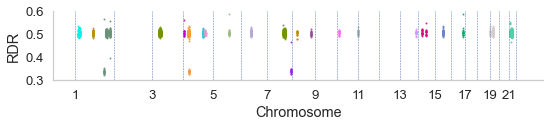

In [14]:

sns.lmplot(data=bb_pre_proc2[bb_pre_proc2["SAMPLE"]=="bulk_035clone1_06clone0_005normal"], x='genomePosition', y='RDR', fit_reg=False, height=2, aspect=4, hue='CLUSTER', palette=inferred_colordict, scatter_kws={"s": 1}, legend=False).set(ylim=(0.3, 0.6), title="")
plt.gca().set_ylabel("RDR")
plt.gca().set_xlabel("Chromosome")
plt.gcf().tight_layout()

maxY = bb_pre_proc2['RDR'].max()

# only display every other chr to prevent overlap of labels
odd_chr_starts = dict(filter(lambda chr_start: chr_start[0] % 2 != 0, chr_starts.items())) 
even_chr_starts = dict(filter(lambda chr_start: chr_start[0] % 2 == 0, chr_starts.items())) 
x_ticks = list(odd_chr_starts.values())
#x_ticks = list(chr_starts.values())
plt.gca().set_xticks(x_ticks)
#plt.gca().set_xticklabels(list(chr_starts.keys()))
plt.gca().set_xticklabels(list(odd_chr_starts.keys()))
# plt.gca().set_xlim((2687514503, 2780078995))
# vertical lines at the last bin position of every cluster 

sns.set_style("whitegrid")
plt.gca().grid(False)

chr_lines = list(chr_starts.values())
plt.gca().vlines(x=chr_lines, ymin=0, ymax=maxY, linestyles='dashed', lw=0.5)

plt.savefig('/Users/gillianchu/mek/cnaviz/simulations/scripts/sim_plot/linearplots/s4669_ascat_rdr.svg', dpi=300, bbox_inches='tight')



In [15]:
# # ASCAT + CNAViz
# bb_post = pd.merge(bb_post, bb_post[['CHR', 'START', 'END']].drop_duplicates().reset_index(drop=True).reset_index())
# bb_post_proc1 = bb_post[bb_post['SAMPLE'] == 'bulk_035clone1_06clone0_005normal']

# bb_post_proc2 = bb_post_proc1[(bb_post_proc1['CLUSTER'] == 0) | (bb_post_proc1['CLUSTER'] == 20)]
# sns.lmplot(data=bb_post_proc2, x='index', y='RDR', row='SAMPLE', fit_reg=False, hue='CLUSTER', palette=edited_colordict, scatter_kws={"s": 1}, height=2, aspect=3).set(xlim=(0,20000), ylim=(0.3, 0.60), title="", xlabel="Position", ylabel="Read Depth Ratio")._legend.remove()
# plt.savefig('/Users/gillianchu/mek/cnaviz/simulations/scripts/sim_plot/linearplots/s4669_post_ascat_rdr.svg', dpi=300, bbox_inches='tight')


/Users/gillianchu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


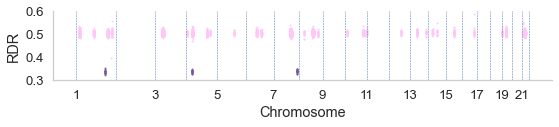

In [17]:
# # ASCAT + CNAViz

bb_post = pd.read_csv(postfile, sep='\t', names=['CHR', 'START', 'END', 'SAMPLE', 'RDR', 'SNPS', 'COV', 'A', 'B', 'BAF', 'CLUSTER'], skiprows=1)
bb_post['CHR'] = bb_post['CHR'].apply(lambda x: int(x[3:]))
bb_post = pd.merge(bb_post.sort_values("CHR"), bb_pre.sort_values("CHR")[['CHR', 'START', 'END']].drop_duplicates().reset_index(drop=True).reset_index())

bb_post_proc1 = bb_post[bb_post['SAMPLE'] == 'bulk_035clone1_06clone0_005normal']
bb_post_proc2 = bb_post_proc1[(bb_post_proc1['CLUSTER'] == 0) | (bb_post_proc1['CLUSTER'] == 20)]


# Get the start of each chromosome in order to calculate the genome position of each bin
chr_starts = {}
chrs = list(bb_post_proc1["CHR"].unique()) # 1 - 22
chrs.sort()
length = 0
for chrm in chrs:
    chr_starts[chrm] = length
    length += bb_post_proc1[bb_post_proc1['CHR'] == chrm]['END'].max()
    
# Create new row in dataframe for the position in the genome
# Just takes the starting genome position of the chromosome and adds the offset of the bin from the start of the chr
bb_post_proc2['genomePosition'] = bb_post_proc2.apply(lambda row: row['START'] + chr_starts[row['CHR']], axis = 1)

sns.lmplot(data=bb_post_proc2[bb_post_proc2["SAMPLE"]=="bulk_035clone1_06clone0_005normal"], x='genomePosition', y='RDR', fit_reg=False, height=2, aspect=4, hue='CLUSTER', palette=edited_colordict, scatter_kws={"s": 1}, legend=False).set(ylim=(0.3, 0.6), title="")
plt.gca().set_ylabel("RDR")
plt.gca().set_xlabel("Chromosome")
plt.gcf().tight_layout()

maxY = bb_pre_proc2['RDR'].max()

# only display every other chr to prevent overlap of labels
odd_chr_starts = dict(filter(lambda chr_start: chr_start[0] % 2 != 0, chr_starts.items())) 
even_chr_starts = dict(filter(lambda chr_start: chr_start[0] % 2 == 0, chr_starts.items())) 
x_ticks = list(odd_chr_starts.values())
# x_ticks = list(chr_starts.values())
plt.gca().set_xticks(x_ticks)
#plt.gca().set_xticklabels(list(chr_starts.keys()))
plt.gca().set_xticklabels(list(odd_chr_starts.keys()))
# plt.gca().set_xlim((2687514503, 2780078995))
# vertical lines at the last bin position of every cluster 
plt.gca().grid(False)

chr_lines = list(chr_starts.values())
plt.gca().vlines(x=chr_lines, ymin=0, ymax=maxY, linestyles='dashed', lw=0.5)

plt.savefig('/Users/gillianchu/mek/cnaviz/simulations/scripts/sim_plot/linearplots/s4669_ascat_cnaviz_rdr.svg', dpi=300, bbox_inches='tight')

